# Plot Multiple Networks

Notebook to plot high level result summaries over many network simulations as shown in `Figure 2` of the paper.  

The results have been previously generated and are stored in a results file. By default, the pre-stored paper generated simulation data will be used from `../simulation_results/paper_results/paper_results_all`.

**To generate fresh data:** If you would like to generate new data to compare different networks, use the python script `run_simulations.py`.

In [1]:
import sys
sys.path.append('../src')
import os
from utils.excel_handler import ExcelHandler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Generate the Figure 2 Plots

These plots consider all the simulations

In [2]:
sim_dir = '../simulation_results/paper_results'
sim_results_file = 'paper_results_all'
sheet_name = 'simulation_summaries'

file_handler = ExcelHandler(sim_dir, sim_results_file)
all_sim_data = file_handler.read_sheet(sheet_name)
r_values_to_plot = [1, 10, 25, 60]
all_sim_data_selected = all_sim_data.loc[all_sim_data['novelty_threshold'].isin(r_values_to_plot)].copy()
all_sim_data_selected

****** FUll file path for excel  ../simulation_results/paper_results/paper_results_all.xlsx


,test,simulation,dataset,trains_per_class,tests_per_class,trains_in_test_set,training_labels,testing_labels,precision_required,shuffle,...,replenish_learning_pool,test_ref,accuracy,average_spikes_per_prediction,sn_av_permanent,sn_av_refreshed,sn_av_train,sn_av_train_contributing,learning_time,inference_time
0,1,1,mnist_784,5000,1000,False,NaN,NaN,7,False,...,1,r_001_h_0025,0.6641,25,60.0,990.6,5000,1651.4,37.72,70.36
1,1,2,mnist_784,5000,1000,False,NaN,NaN,7,False,...,1,r_001_h_0025,0.6416,24,54.7,1037.8,5000,1707.4,37.24,67.36
2,1,3,mnist_784,5000,1000,False,NaN,NaN,7,False,...,1,r_001_h_0025,0.6499,24,54.5,1052.6,5000,1742.9,37.10,67.74
3,1,4,mnist_784,5000,1000,False,NaN,NaN,7,False,...,1,r_001_h_0025,0.6362,25,53.2,1028.3,5000,1691.6,37.01,64.31
4,1,5,mnist_784,5000,1000,False,NaN,NaN,7,False,...,1,r_001_h_0025,0.6470,24,54.1,1023.1,5000,1683.5,35.93,67.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,5,21,mnist_784,5000,1000,False,NaN,NaN,7,False,...,1,r_060_h_0750,0.8611,881,1880.6,39018.0,5000,2124.6,928.17,1612.13
146,5,22,mnist_784,5000,1000,False,NaN,NaN,7,False,...,1,r_060_h_0750,0.8562,884,1850.1,39068.3,5000,2129.4,857.43,1785.88
147,5,23,mnist_784,5000,1000,False,NaN,NaN,7,False,...,1,r_060_h_0750,0.8517,894,1896.4,39185.1,5000,2127.2,836.05,1578.62
148,5,24,mnist_784,5000,1000,False,NaN,NaN,7,False,...,1,r_060_h_0750,0.8575,890,1867.1,38882.6,5000,2115.3,928.20,1590.67


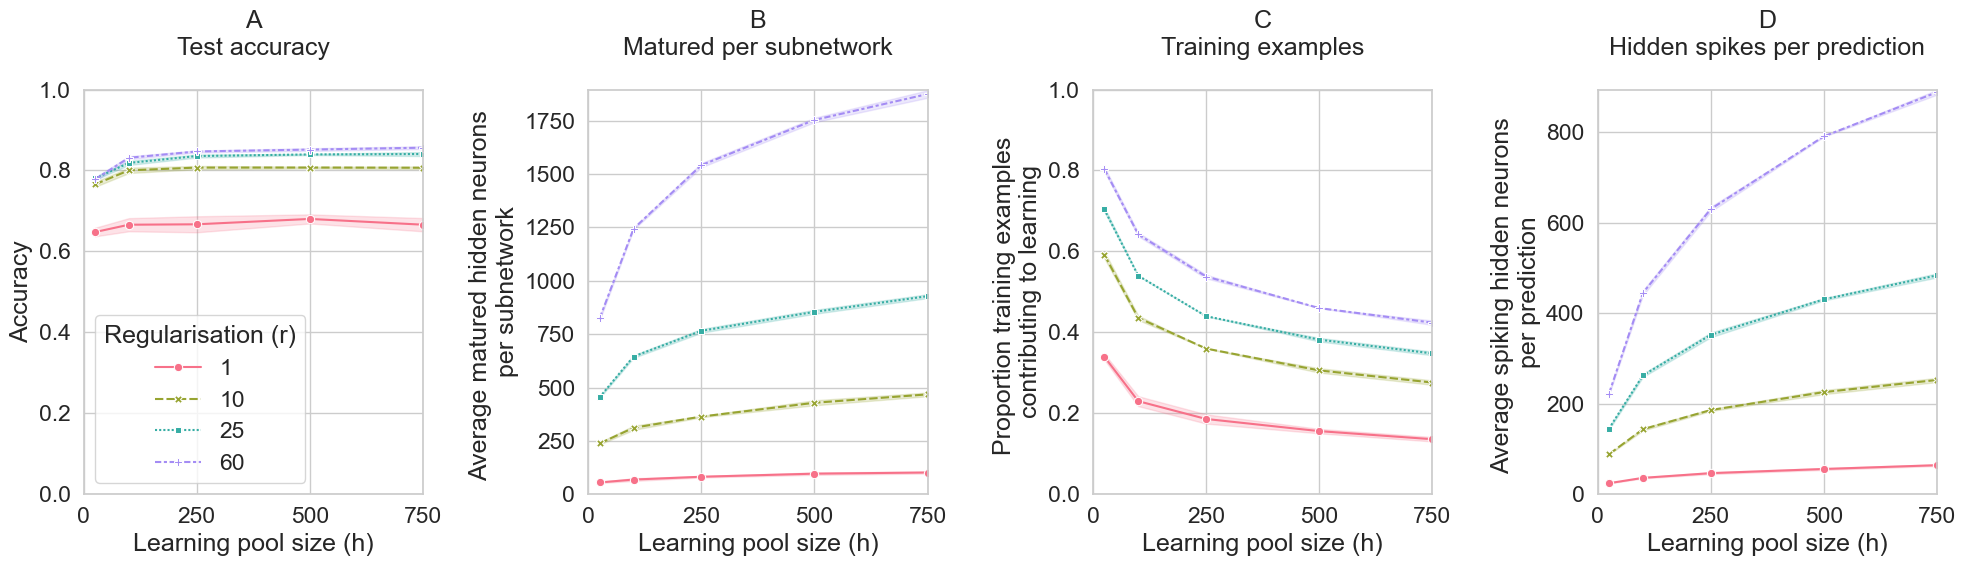

In [3]:
palette = sns.color_palette("husl", len(r_values_to_plot))
sns.set(font_scale = 1.5, style='whitegrid')
fig, axs = plt.subplots(1, 4, figsize=(20,6))

def plot_sub_graph(axis: int, title: str, y_data: str, y_data_label: str, y_min: float = None, y_max: float = None,):
    sns.lineplot(data=all_sim_data_selected, x='learning_pool_size', y=y_data, hue='novelty_threshold', style='novelty_threshold',
                 markers=True, ax=axs[axis], palette = palette, errorbar='sd')
    axs[axis].set_title(title+'\n') #, fontsize=fontsize)
    axs[axis].grid(visible=True)
    axs[axis].set_xlabel('Learning pool size (h)') 
    axs[axis].set_ylabel(y_data_label)
    axs[axis].set_xlim(np.min(all_sim_data_selected['learning_pool_size']),750) #np.max(all_sim_data_selected['learning_pool_size']))
    if y_min is None: y_min = np.min(all_sim_data_selected[y_data])
    if y_max is None: y_max = np.max(all_sim_data_selected[y_data])

    axs[axis].set_ylim(y_min, y_max)
    axs[axis].set_xticks(ticks=[0, 250, 500, 750])
    axs[axis].legend(title='Regularisation (r)')

# Plot A: Test accuracy
plot_sub_graph(axis=0, title='A\nTest accuracy', y_data='accuracy', y_data_label='Accuracy',y_min=0, y_max=1)
# Plot B: Maturity rates
plot_sub_graph(axis=1, title='B\nMatured per subnetwork', y_data='sn_av_permanent', y_data_label='Average matured hidden neurons \nper subnetwork', y_min=0)
# Plot C: Contrubuting training examples
all_sim_data_selected['percent_training_contributing'] = np.round(np.divide(all_sim_data_selected['sn_av_train_contributing'], all_sim_data_selected['sn_av_train']), 2)
plot_sub_graph(axis=2, title='C\nTraining examples', y_data='percent_training_contributing', y_data_label='Proportion training examples \ncontributing to learning', y_min=0, y_max=1)
# Plot D: Hidden spikes per prediction
all_sim_data_selected['hidden_spikes'] = all_sim_data_selected['average_spikes_per_prediction']
plot_sub_graph(axis=3, title='D\nHidden spikes per prediction', y_data='hidden_spikes', y_data_label='Average spiking hidden neurons \nper prediction', y_min=0)

plt.tight_layout()
# Only require the legend on the first plot
axs[1].get_legend().remove()
axs[2].get_legend().remove()
axs[3].get_legend().remove()

plt.show()
#Uncomment the following line to save the image
#plt.savefig(sim_dir + os.path.sep + 'paper_figure_2.png', dpi=1000)
plt.close()

## Generate Tradeoff Plots

Explore the relationship betweeen test accuracy and indicators of computational cost: subnetwork sizes and numbers of neurons firing per prediction.

For this, select the `test_summaries` sheet which gives an average of all the simulations per network scenario.

In [8]:
sheet_name = 'test_summaries'
file_handler = ExcelHandler(sim_dir, sim_results_file)
summary_sim_data = file_handler.read_sheet(sheet_name)
r_values_to_plot = [1, 10, 60]
h_values_to_plot = [25, 250, 500, 750]

summary_sim_data_selected_r = summary_sim_data.loc[summary_sim_data['novelty_threshold'].isin(r_values_to_plot)].copy()
summary_sim_data_selected = summary_sim_data_selected_r.loc[summary_sim_data_selected_r['learning_pool_size'].isin(h_values_to_plot)].copy()
palette = sns.color_palette("husl", len(r_values_to_plot))
sns.set(font_scale = 1.5, style='whitegrid')
summary_sim_data_selected

****** FUll file path for excel  ../simulation_results/paper_results/paper_results_all.xlsx


,test_ref,test,num simulations,dataset,trains_per_class,tests_per_class,trains_in_test_set,training_labels,testing_labels,precision_required,...,p_potentiate,p_deprecate,p_mature_threshold,replenish_learning_pool,average_accuracy,accuracy_variation,average_spikes_per_test,sn_av_perm,sn_av_refresh,sn_av_train
1,r_060_h_0750,5,5,mnist_784,5000,1000,False,NaN,NaN,7,...,0.2,0.02,1,1,0.8563,0.0048,888.0,1875.32,39037.20,5000
3,r_060_h_0500,4,5,mnist_784,5000,1000,False,NaN,NaN,7,...,0.2,0.02,1,1,0.8516,0.0038,790.6,1753.82,28102.44,5000
6,r_060_h_0250,3,5,mnist_784,5000,1000,False,NaN,NaN,7,...,0.2,0.02,1,1,0.8470,0.0027,630.0,1542.12,16140.18,5000
16,r_010_h_0500,4,5,mnist_784,5000,1000,False,NaN,NaN,7,...,0.2,0.02,1,1,0.8073,0.0030,225.6,428.60,19160.36,5000
17,r_010_h_0250,3,5,mnist_784,5000,1000,False,NaN,NaN,7,...,0.2,0.02,1,1,0.8071,0.0063,186.0,364.04,11153.92,5000
18,r_010_h_0750,5,5,mnist_784,5000,1000,False,NaN,NaN,7,...,0.2,0.02,1,1,0.8068,0.0046,252.4,467.96,26231.24,5000
23,r_060_h_0025,1,5,mnist_784,5000,1000,False,NaN,NaN,7,...,0.2,0.02,1,1,0.7781,0.0066,222.2,823.66,2468.26,5000
28,r_010_h_0025,1,5,mnist_784,5000,1000,False,NaN,NaN,7,...,0.2,0.02,1,1,0.7656,0.0090,88.4,238.24,1752.84,5000
30,r_001_h_0500,4,5,mnist_784,5000,1000,False,NaN,NaN,7,...,0.2,0.02,1,1,0.6803,0.0158,55.8,96.48,9786.26,5000
31,r_001_h_0250,3,5,mnist_784,5000,1000,False,NaN,NaN,7,...,0.2,0.02,1,1,0.6670,0.0270,46.6,82.04,5885.50,5000


### Accuracy vs Subnetwork Size


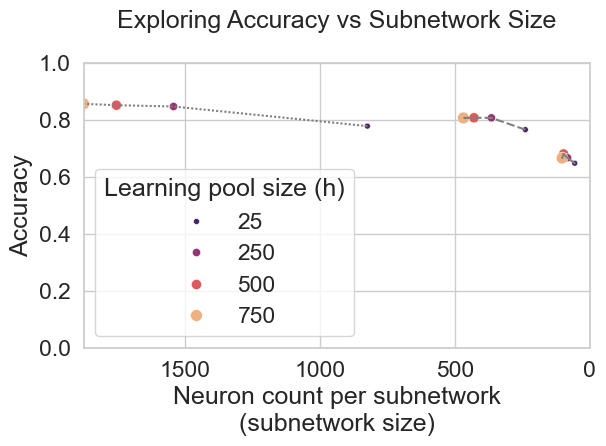

In [9]:
x_data = 'sn_av_perm'
x_data_label = 'Neuron count per subnetwork\n(subnetwork size)'
y_data = 'average_accuracy'
y_data_label = 'Accuracy'
hue_data = 'learning_pool_size'
style_data = 'novelty_threshold'

title= 'Exploring Accuracy vs Subnetwork Size'
sns.lineplot(data=summary_sim_data_selected, x=x_data, y=y_data, style=style_data,
                markers=False, legend=False, c='gray')
sns.scatterplot(data=summary_sim_data_selected, x=x_data, y=y_data,  palette =sns.color_palette("flare_r", as_cmap=True), #palette =  palette, 
                markers=True, legend=True, size=hue_data, hue=hue_data)
plt.legend(title='Learning pool size (h)')
plt.title(title+'\n') 
plt.ylim(0,1)
plt.ylabel(y_data_label)
plt.xlim(0,np.max(summary_sim_data_selected[x_data]))
plt.xlabel(x_data_label)
plt.gca().invert_xaxis()
plt.tight_layout()

plt.savefig(sim_dir + os.path.sep + 'poster_plots_accuracy_neurons.png', dpi=1000)
plt.show()
plt.close()

### Accuracy vs Average Spikes

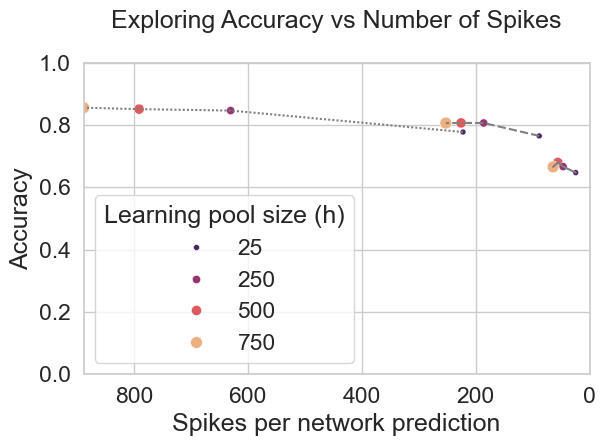

In [10]:
x_data = 'average_spikes_per_test'
x_data_label = 'Spikes per network prediction'
y_data = 'average_accuracy'
y_data_label = 'Accuracy'
hue_data = 'learning_pool_size'
style_data = 'novelty_threshold'
title= 'Exploring Accuracy vs Number of Spikes'

sns.lineplot(data=summary_sim_data_selected, x=x_data, y=y_data, style=style_data,
                markers=False, legend=False, c='gray')
sns.scatterplot(data=summary_sim_data_selected, x=x_data, y=y_data,  palette =sns.color_palette("flare_r", as_cmap=True), 
                markers=True, legend=True, size=hue_data, hue=hue_data)
plt.legend(title='Learning pool size (h)')
plt.title(title+'\n') 
plt.ylim(0,1)
plt.ylabel(y_data_label)
plt.xlim(0,np.max(summary_sim_data_selected[x_data]))
plt.xlabel(x_data_label)
plt.gca().invert_xaxis()
plt.tight_layout()

plt.savefig(sim_dir + os.path.sep + 'poster_plots_accuracy_spikes.png', dpi=1000)
plt.show()

plt.close()

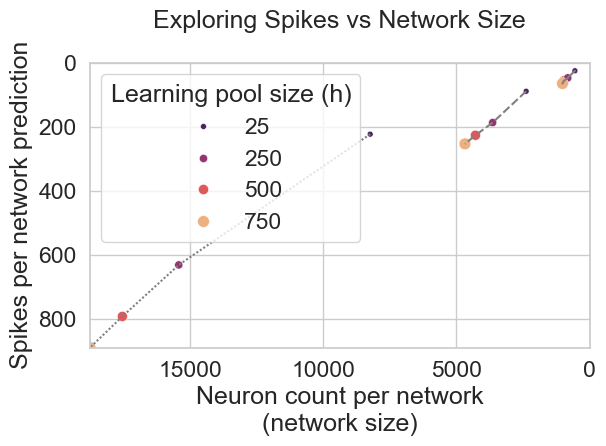

In [11]:
summary_sim_data_selected['whole_network_perm'] = summary_sim_data_selected['sn_av_perm'] * 10

x_data = 'whole_network_perm'
x_data_label = 'Neuron count per network\n(network size)'
y_data = 'average_spikes_per_test'
y_data_label = 'Spikes per network prediction'
hue_data = 'learning_pool_size'
style_data = 'novelty_threshold'

title= 'Exploring Spikes vs Network Size'
sns.lineplot(data=summary_sim_data_selected, x=x_data, y=y_data, style=style_data,
                markers=False, legend=False, c='gray')
sns.scatterplot(data=summary_sim_data_selected, x=x_data, y=y_data,  palette =sns.color_palette("flare_r", as_cmap=True), #palette =  palette, 
                markers=True, legend=True, size=hue_data, hue=hue_data)
plt.legend(title='Learning pool size (h)')
plt.title(title+'\n') 
plt.ylim(0,np.max(summary_sim_data_selected[y_data]))
plt.ylabel(y_data_label)
plt.xlim(0,np.max(summary_sim_data_selected[x_data]))
plt.xlabel(x_data_label)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.tight_layout()

plt.savefig(sim_dir + os.path.sep + 'poster_plots_spikes_neurons.png', dpi=1000)
plt.show()
plt.close()